# Import Statements

In [2]:
%matplotlib inline
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import random as rnd
import csv
import random
import math
import operator
import copy

# Load and Prepare CIFAR-10 Data

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
dict1 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\batches.meta")
for i in dict1:
    print(i)

b'num_cases_per_batch'
b'label_names'
b'num_vis'


# Support Vector Machine

In [7]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss  = 0.0
        
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxItr=20):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #Initial Loss
        
        #Training from here...
        # Weight and Bias update rule
        losses = []
        
        for i in range(maxItr):
            #Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
             #Batch Gradient Descent(Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti =  Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                #Gradient for the batch is ready! Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        
        self.W = W
        self.b = bias
        return W,bias,losses

# One vs. All Classifier

In [8]:
def findtrainsubset(X,Y,drop_size):
        Xsub=[]
        Ysub=[]
        indices=[]
        if isinstance(drop_size,float):
            drop_size=round(drop_size * len(X))
        for i in range(len(X)):
            indices.append(i)
        drop_indices = random.sample(population=indices,k=drop_size)
        for i in range(len(X)):
            if i not in drop_indices:
                Xsub.append(X[i,:])
                Ysub.append(Y[i])
        Xsub=np.array(Xsub)
        Ysub=np.array(Ysub)
        return Xsub,Ysub

In [9]:
def segregateclasses(data,labels):
    data_classes={}
    for i in labels:
        if i not in data_classes:
            data_classes[i]=[]
        data_classes[i].append(data[i,:])
    for i in data_classes.keys():
        data_classes[i]=np.array(data_classes[i])
    return data_classes

In [11]:
def combineoneall(data,i):
    l1=data[i].shape[0]
    l2=0
    idx=l1
    for j in range(len(data)):
        if(i!=j):
            l2+=data[j].shape[0]
    sample_size=l1+l2
    feature_size=data[i].shape[1]
    data_pair=np.zeros((sample_size,feature_size))
    data_labels=np.zeros((sample_size,1))
    data_pair[:l1,:]=data[i]
    
    for j in range(len(data)):
        if(j!=i):
            for k in range(data[j].shape[0]):
                data_pair[idx,:]=data[j][k]
                idx+=1
                
    data_labels[:l1]=-1
    data_labels[l1:]=1
    return data_pair,data_labels

In [12]:
mySVM = SVM()

In [13]:
def trainSVM():
    svm_classifiers = {}
    Xtrain = []
    Ytrain = []
    bias = np.zeros(shape=(len(dict1[b'label_names']),1))
    for i in range(1,6):
        svm_classifiers[i] = {}
        file_path = "C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_" + str(i)
        dict = unpickle(file_path)
        data = []
        labels = []
        
        for row in dict[b'data']:
            data.append(row)
            Xtrain.append(row)
        for row in dict[b'labels']:
            labels.append(row)
            Ytrain.append(row)
        
        data = np.array(data)
        labels = np.array(labels)
        
        data_classes = segregateclasses(data,labels)
        for j in range(len(data_classes)):
            xpair,ypair=combineoneall(data_classes,j)
            #print(xpair.shape[0])
            w,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=20)
            svm_classifiers[i][j]=(w,b,loss)
            
    return Xtrain,Ytrain,svm_classifiers

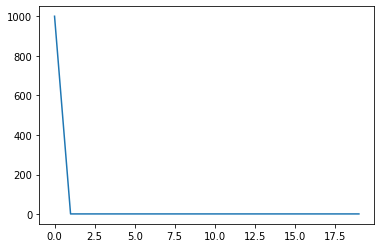

In [14]:
#svm_classifiers = {}
xpair,ypair=combineoneall(data_classes,0)
xsub,ysub=findtrainsubset(xpair,ypair,0.90)
bias = 0.0
mySVM = SVM()
w,b,loss = mySVM.fit(xsub,ysub,learning_rate=0.00001,maxItr=20)
plt.plot(loss)

In [14]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [15]:
Xtrain,Ytrain,svm_classifier = trainSVM()

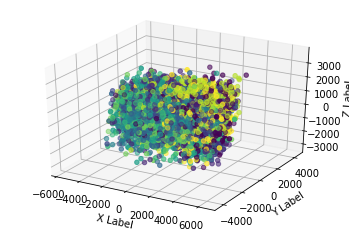

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=labels, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [70]:
def visualize(X,data_dict,w,b):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        colors=['0.6','0.75','0.78','0.745','0.45','0.67','0.878','0.903','0.456','0.534']
        [[ax.scatter(x[0],x[1],s=100,c=colors[i]) for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v)/w[1]
        min_feature_value=min(X[:,0]+X[:,1])
        max_feature_value=max(X[:,0]+X[:,1])
        hyp_x_min= min_feature_value*0.9
        hyp_x_max = max_feature_value*1.1
        
        # (w.x+b)=1
        # positive support vector hyperplane
        pav1 = hyperplane(hyp_x_min,w,b,1)
        pav2 = hyperplane(hyp_x_max,w,b,1)
        ax.plot([hyp_x_min,hyp_x_max],[pav1,pav2],'k')
        
        # (w.x+b)=-1
        # negative support vector hyperplane
        nav1 = hyperplane(hyp_x_min,w,b,-1)
        nav2 = hyperplane(hyp_x_max,w,b,-1)
        ax.plot([hyp_x_min,hyp_x_max],[nav1,nav2],'k')
        
        # (w.x+b)=0
        # db support vector hyperplane
        db1 = hyperplane(hyp_x_min,w,b,0)
        db2 = hyperplane(hyp_x_max,w,b,0)
        ax.plot([hyp_x_min,hyp_x_max],[db1,db2],'y--')

# Support vector image for class-0

# Batch-1

In [65]:
dict_1 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_1")
data_1 = []
labels_1 = []
for row in dict[b'data']:
    data_1.append(row)
for row in dict[b'labels']:
    labels_1.append(row)
data_1=np.array(data_1)
labels_1=np.array(labels_1)
X_1=pca.transform(data_1)
w_1=pca.transform(svm_classifier[1][0][0])
w_1=w_1[0]
b_1=svm_classifier[1][0][1][0]
data_classes_1 = segregateclasses(X_1,labels_1)

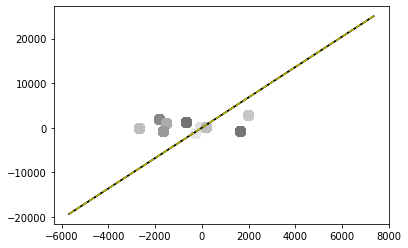

In [71]:
visualize(X_1,data_classes_1,w_1,b_1)

# Batch-2

In [72]:
dict_2 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_2")
data_2 = []
labels_2 = []
for row in dict[b'data']:
    data_2.append(row)
for row in dict[b'labels']:
    labels_2.append(row)
data_2=np.array(data_2)
labels_2=np.array(labels_2)
X_2=pca.transform(data_2)
w_2=pca.transform(svm_classifier[2][0][0])
w_2=w_2[0]
b_2=svm_classifier[2][0][1][0]
data_classes_2 = segregateclasses(X_2,labels_2)

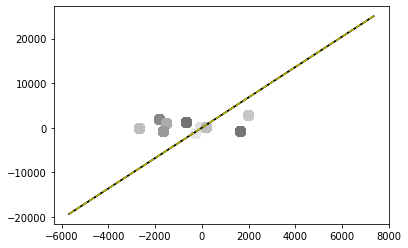

In [77]:
visualize(X_2,data_classes_2,w_2,b_2)

# Batch-3

In [75]:
dict_3 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_3")
data_3 = []
labels_3 = []
for row in dict[b'data']:
    data_3.append(row)
for row in dict[b'labels']:
    labels_3.append(row)
data_3=np.array(data_3)
labels_3=np.array(labels_3)
X_3=pca.transform(data_3)
w_3=pca.transform(svm_classifier[3][0][0])
w_3=w_3[0]
b_3=svm_classifier[3][0][1][0]
data_classes_3 = segregateclasses(X_3,labels_3)

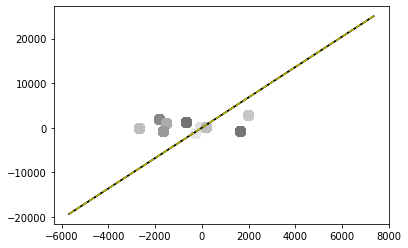

In [78]:
visualize(X_3,data_classes_3,w_3,b_3)

# Batch-4

In [74]:
dict_4 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_4")
data_4 = []
labels_4 = []
for row in dict[b'data']:
    data_4.append(row)
for row in dict[b'labels']:
    labels_4.append(row)
data_4=np.array(data_4)
labels_4=np.array(labels_4)
X_4=pca.transform(data_4)
w_4=pca.transform(svm_classifier[4][0][0])
w_4=w_4[0]
b_4=svm_classifier[4][0][1][0]
data_classes_4 = segregateclasses(X_4,labels_4)

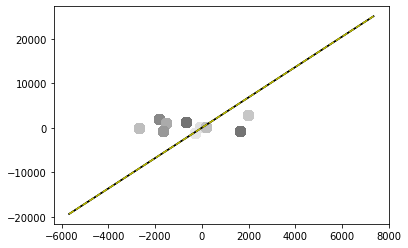

In [79]:
visualize(X_4,data_classes_4,w_4,b_4)

# Batch-5

In [80]:
dict_5 = unpickle("C:\\Users\\Aklesh Mishra\\cifar-10-batches-py\\data_batch_5")
data_5 = []
labels_5 = []
for row in dict[b'data']:
    data_5.append(row)
for row in dict[b'labels']:
    labels_5.append(row)
data_5=np.array(data_5)
labels_5=np.array(labels_5)
X_5=pca.transform(data_5)
w_5=pca.transform(svm_classifier[5][0][0])
w_5=w_5[0]
b_5=svm_classifier[5][0][1][0]
data_classes_5 = segregateclasses(X_5,labels_5)

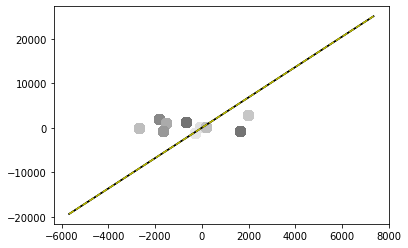

In [81]:
visualize(X_5,data_classes_5,w_5,b_5)